## Семинар 7
# Тема: Многослойный перцептрон

**Многослойный перцептрон** (Multi-layer Perceptron - MLP) — это класс искусственных нейронных сетей прямого распространения, состоящих как минимум из трех слоев: входного, скрытого и выходного. За исключением входных, все нейроны использует нелинейную функцию активации.
При обучении MLP используется обучение с учителем и алгоритм обратного распространения ошибки. 

В отличие от линейных моделей, он способен выучивать нелинейные зависимости в данных, благодаря тому, что между входным и выходным слоем может быть один или несколько нелинейных слоев, называемых скрытыми слоями. На рисунке 1 показан MLP с одним скрытым слоем и скалярным выходом.

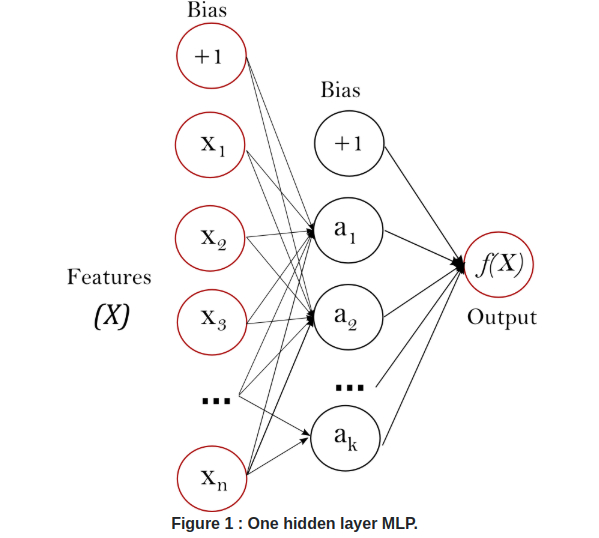

Самый левый слой, называется входной, он состоит из набора нейронов $\{ x_i | x_1, x_2,..., x_n\}$, представляющих входные признаки. Каждый нейрон в скрытом слое преобразует значения из предыдущего слоя с помощью взвешенного линейного сложения $w_1 x_1 +w_2 x_2 + ... +w_n x_n$, за которым следует нелинейная функция активации $ a : R \to R$, которая вычисляется на этой взвешенной сумме. Выходной слой получает значения из последнего скрытого слоя и преобразует их в выходные значения.

Многослойный перцептрон чувствителен к масштабированию признаков, поэтому настоятельно рекомендуется выполнять масштабирование.

Классы MLPClassifier и MLPRegressor в sklearn осуществляют реализацию многослойного перцептрона для задач классификации и регрессии соответственно. Эти классы содержит атрибуты coefs_ и intercepts_. 

`coefs_` - это список матриц весов, где матрица весов с индексом i представляет собой веса между слоем i и слоем i+1. 

`intercepts_` - список векторов смещения, где вектор с индексом i представляет значения смещения, добавленные к слою i+1.

Преимуществами многослойного перцептрона являются:

* Возможность описывать нелинейные зависимости в данных.

К недостаткам многослойного перцептрона (MLP) относятся:

* MLP со скрытыми слоями имеют невыпуклую функцию потерь, в которой существует более одного локального минимума. Поэтому различные случайные инициализации весов могут привести к разной точности проверки.
* MLP требует настройки ряда гиперпараметров, таких как количество скрытых нейронов, слоев и итераций.
* MLP чувствительна к масштабированию признаков.

Несмотря на то что классы MLPClassifier и MLPRegressor предлагают легкий в использовании интерфейс, они представляют лишь небольшой набор  возможных средств, позволяющих строить нейронные сети. Данная реализация не предназначена для крупномасштабных приложений. В частности, scikit-learn не предлагает поддержки GPU (более быстрая реализация). Если вас интересует работа с более гибкими или более масштабными моделями, рекомендуется не ограничиваться возможностями библиотеки scikit-learn и обратиться к фантастическим по своими возможностями библиотекам глубокого обучения. Для пользователей Python наиболее устоявшимися являются keras и tenzor-flow.

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier, MLPRegressor 

### 1. Загрузите встроенный датасет о вине load_wine. Выведите его описание. Возьмите в качестве X признаки, а целевую переменную обозначьте за y. Выведите их размеры. Выведите признаки в виде датафрейма с соответствующими названиями колонок. Убедитесь, что целевая переменная содержит три класса и определите сколько объектов в каждом классе. Выведите описательную статистику признаков.

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [4]:
df = pd.DataFrame(X, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
X.shape, y.shape

((178, 13), (178,))

In [6]:
pd.Series(y).value_counts()

1    71
0    59
2    48
Name: count, dtype: int64

In [7]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 2. Разделите данные на обучающую и тестовую части в соотношении 3:1, зафиксировав random_state=42, со стратификацией. Выведите получившиеся размеры обучающей и тестовой выборок.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train.shape, X_test.shape

((133, 13), (45, 13))

In [9]:
pd.Series(y_test).value_counts()

1    18
0    15
2    12
Name: count, dtype: int64

### 3. Обучите на обучающих данных модель многослойного перцептрона с одним скрытым слоем из 5 нейронов с максимальным количеством итераций max_iter=1000, зафиксировав random_state=42. Выведите получившиеся весовые матрицы, выведите размеры весовых матриц.

In [10]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5, ), random_state=42, max_iter=1000)
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

In [11]:
mlp_clf.coefs_

[array([[-0.13956594,  0.51164308,  0.25589462,  0.10929957, -0.38905247],
        [-0.38908015, -0.50152941,  0.41083557,  0.11206772,  0.23348986],
        [-0.5446451 ,  0.53371367,  0.37188282, -0.32448757, -0.35945501],
        [-0.35764412, -0.21944549,  0.01659733, -0.07494214, -0.23428656],
        [ 0.12418262, -0.40801517, -0.25199962, -0.14882676, -0.04807649],
        [ 0.32164157, -0.33899706,  0.00444716,  0.10226977, -0.51490265],
        [ 0.11931931, -0.37241346, -0.51422514,  0.5095407 ,  0.52879464],
        [ 0.34824661, -0.21902197, -0.47655694,  0.20631354, -0.06577648],
        [-0.42805382, -0.00520142, -0.5496313 ,  0.46407057, -0.27134599],
        [ 0.18160923, -0.21093374,  0.01118495,  0.05116007, -0.35598188],
        [ 0.53333968,  0.31014183,  0.49550014,  0.44742201,  0.10844512],
        [ 0.47849492, -0.46658332, -0.36303832, -0.51630885, -0.19542569],
        [-0.12358391, -0.2569831 ,  0.36760461, -0.15971991, -0.24603626]]),
 array([[ 0.46297541, -

In [12]:
mlp_clf.coefs_[0]

array([[-0.13956594,  0.51164308,  0.25589462,  0.10929957, -0.38905247],
       [-0.38908015, -0.50152941,  0.41083557,  0.11206772,  0.23348986],
       [-0.5446451 ,  0.53371367,  0.37188282, -0.32448757, -0.35945501],
       [-0.35764412, -0.21944549,  0.01659733, -0.07494214, -0.23428656],
       [ 0.12418262, -0.40801517, -0.25199962, -0.14882676, -0.04807649],
       [ 0.32164157, -0.33899706,  0.00444716,  0.10226977, -0.51490265],
       [ 0.11931931, -0.37241346, -0.51422514,  0.5095407 ,  0.52879464],
       [ 0.34824661, -0.21902197, -0.47655694,  0.20631354, -0.06577648],
       [-0.42805382, -0.00520142, -0.5496313 ,  0.46407057, -0.27134599],
       [ 0.18160923, -0.21093374,  0.01118495,  0.05116007, -0.35598188],
       [ 0.53333968,  0.31014183,  0.49550014,  0.44742201,  0.10844512],
       [ 0.47849492, -0.46658332, -0.36303832, -0.51630885, -0.19542569],
       [-0.12358391, -0.2569831 ,  0.36760461, -0.15971991, -0.24603626]])

In [13]:
mlp_clf.coefs_[1]

array([[ 0.46297541, -0.51303663, -0.84665585],
       [ 0.53748813,  0.35041137,  0.38851255],
       [ 0.45787456, -0.72579725, -0.23316458],
       [-0.65600703,  0.61970219,  0.20712696],
       [-0.28556228, -0.7463617 , -0.3197526 ]])

In [14]:
[coef.shape for coef in mlp_clf.coefs_]

[(13, 5), (5, 3)]

### 4. Оцените качество построенной модели на тестовых данных. Для этого сделайте предсказание и выведите матрицу ошибок классификации, метрику accuracy и F1-меру, усреднённую весовым способом.

In [15]:
mlp_clf.score(X_test, y_test)

0.3333333333333333

In [16]:
y_test_pred = mlp_clf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [18,  0,  0],
       [12,  0,  0]])

In [17]:
f1_score(y_test, y_test_pred, average='weighted')

np.float64(0.16666666666666666)

### 5. Масштабируйте данные методом стандартной нормализации без использования конвейера. Обучите на масштабированных обучающих данных модель многослойного перцептрона с одним скрытым слоем из 5 нейронов с максимальным количеством итераций max_iter=1000 и зафиксировав random_state=42. Оцените качаство построенной модели на масштабированных тестовых данных, вычислив метрику accuracy и F1-меру, усреднённую весовым способом. Сравните эти метрики с теми, которые были получены без масштабирования данных. Сделайте вывод о необходимости масштабирования в данном случае.

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)

In [20]:
mlp_clf.score(X_test_scaled, y_test)

0.9777777777777777

In [21]:
y_test_pred = mlp_clf.predict(X_test_scaled)
confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 12]])

In [22]:
f1_score(y_test, y_test_pred, average='weighted')

np.float64(0.9779047619047617)

### 6. Проделайте предыдущее задание с использованием конвейера. Убедитесь, что результаты получатся теми же.

In [23]:
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', mlp_clf)])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000,
                               random_state=42))])

In [24]:
pipe.score(X_test, y_test)

0.9777777777777777

In [25]:
y_test_pred = pipe.predict(X_test)
f1_score(y_test, y_test_pred, average='weighted')

np.float64(0.9779047619047617)

In [26]:
[coef.shape for coef in pipe.named_steps['classifier'].coefs_]

[(13, 5), (5, 3)]

### 7. Обучите на масштабированных обучающих данных (с использованием конвейера) модель многослойного перцептрона с двумя скрытыми слоями из 4 и 5 нейронов соответственно с максимальным количеством итераций max_iter=10000 и зафиксировав random_state=42 со следующей функцией активации activation = 'logistic'. Выведите получившиеся размеры весовых матриц. Оцените качество построенной модели на тестовых данных, выведя матрицу ошибок классификации, метрику accuracy и F1-меру, усреднённую весовым способом. Улучшились ли метрики качества?

In [27]:
mlp_clf_2 = MLPClassifier(hidden_layer_sizes=(4, 5), activation='logistic', random_state=42, max_iter=10000)

In [28]:
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', mlp_clf_2)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(4, 5),
                               max_iter=10000, random_state=42))])

In [29]:
pipe.score(X_test, y_test)

1.0

In [30]:
y_test_pred = pipe.predict(X_test)
f1_score(y_test, y_test_pred, average='weighted')

np.float64(1.0)

In [31]:
[coef.shape for coef in pipe.named_steps['classifier'].coefs_]

[(13, 4), (4, 5), (5, 3)]

### 8. Реализуйте поиск оптимальных гиперпараметров с перекрёстной проверкой модели MLPClassifier(random_state=42,max_iter=1000) по метрике accuracy, используя класс GridSearchCV (установите параметры cv=3, n_jobs = -1). Выведите оптимальные гиперпараметры. Для оптимальной модели оцените качество на тестовых данных, выведя метрику accuracy и F1-меру, усреднённую весовым способом.

In [32]:
mlp_grid= {
    "hidden_layer_sizes": [
        (5, ),
        (10,10),
        (40,20,10),
        (30,15,5)
    ],
    "activation":["logistic","tanh","relu"],
    "learning_rate_init":[0.1,0.05,0.02],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

In [33]:
gs = GridSearchCV(
    estimator=MLPClassifier(random_state=42, max_iter=1000),
    param_grid=mlp_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

In [34]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(5,), (10, 10), (40, 20, 10),
                                                (30, 15, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.1, 0.05, 0.02],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [35]:
pd.DataFrame(gs.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.085470,0.004211,0.000664,0.000939,logistic,0.0001,"(5,)",constant,0.10,sgd,"{'activation': 'logistic', 'alpha': 0.0001, 'h...",1.0,0.977273,0.977273,0.984848,0.010714,23
1,0.039684,0.001095,0.000000,0.000000,logistic,0.0001,"(5,)",constant,0.10,adam,"{'activation': 'logistic', 'alpha': 0.0001, 'h...",1.0,0.977273,0.977273,0.984848,0.010714,23
2,0.122377,0.016182,0.001333,0.000470,logistic,0.0001,"(5,)",constant,0.05,sgd,"{'activation': 'logistic', 'alpha': 0.0001, 'h...",1.0,0.977273,0.977273,0.984848,0.010714,23
3,0.062164,0.001929,0.000670,0.000947,logistic,0.0001,"(5,)",constant,0.05,adam,"{'activation': 'logistic', 'alpha': 0.0001, 'h...",1.0,0.977273,0.977273,0.984848,0.010714,23
4,0.194502,0.006832,0.000997,0.000005,logistic,0.0001,"(5,)",constant,0.02,sgd,"{'activation': 'logistic', 'alpha': 0.0001, 'h...",1.0,0.977273,0.977273,0.984848,0.010714,23


In [36]:
gs.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (40, 20, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.05,
 'solver': 'adam'}

In [37]:
best_estimator = gs.best_estimator_
best_estimator

MLPClassifier(activation='logistic', hidden_layer_sizes=(40, 20, 10),
              learning_rate_init=0.05, max_iter=1000, random_state=42)

In [38]:
best_estimator.score(X_test_scaled, y_test)

0.9777777777777777

In [39]:
y_test_pred = best_estimator.predict(X_test_scaled)
f1_score(y_test, y_test_pred, average='weighted')

np.float64(0.9775949862906386)

### 9. Реализуйте поиск оптимальных гиперпараметров с перекрёстной проверкой модели MLPClassifier(random_state=42,max_iter=1000) по метрике accuracy, используя класс GridSearchCV (установив параметры cv=3, n_jobs = -1), предварительно масштабировав данные с использованием конвейера. Выведите оптимальные гиперпараметры. Для оптимальной модели оцените качество на тестовых данных, выведя метрику accuracy и F1-меру, усреднённую весовым способом.

In [51]:
mlp_grid_scaler = {
    "classifier__hidden_layer_sizes": [
        (5, ),
        (10,10),
        (40,20,10),
        (30,15,5)
    ],
    "classifier__activation":["logistic","tanh","relu"],
    "classifier__learning_rate_init":[0.1,0.05,0.02],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.0001, 0.05],
    'classifier__learning_rate': ['constant','adaptive']
}

In [52]:
pipe_scaler = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier(random_state=42, max_iter=1000))])

In [53]:
gs_scaled = GridSearchCV(
    estimator=pipe_scaler,
    param_grid=mlp_grid_scaler,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

In [54]:
gs_scaled.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier',
                                        MLPClassifier(max_iter=1000,
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__activation': ['logistic', 'tanh', 'relu'],
                         'classifier__alpha': [0.0001, 0.05],
                         'classifier__hidden_layer_sizes': [(5,), (10, 10),
                                                            (40, 20, 10),
                                                            (30, 15, 5)],
                         'classifier__learning_rate': ['constant', 'adaptive'],
                         'classifier__learning_rate_init': [0.1, 0.05, 0.02],
                         'classifier__solver': ['sgd', 'adam']},
             scoring='accuracy')

In [56]:
gs.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (40, 20, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.05,
 'solver': 'adam'}

In [60]:
best_estimator = gs.best_estimator_
best_estimator

MLPClassifier(activation='logistic', hidden_layer_sizes=(40, 20, 10),
              learning_rate_init=0.05, max_iter=1000, random_state=42)

In [62]:
best_estimator.score(X_test_scaled, y_test)

0.9777777777777777

In [63]:
y_test_pred = best_estimator.predict(X_test_scaled)
f1_score(y_test, y_test_pred, average='weighted')

np.float64(0.9775949862906386)

# Задания для самостоятельного выполнения

### 1. Загрузите датасет [concrete_data.csv](https://www.kaggle.com/datasets/zain280/concrete-data). Выведите в виде датафрейма его первые 5 строк и размеры. Убедитесь, что в данных нет пропущенных значений и все колонки числовые. Возьмите в качестве набора признаков X все столбцы, кроме последнего. За целевую переменную y обозначьте последний столбец concrete_compressive_strength.

In [66]:
concrete = pd.read_csv('concrete_data.csv')
concrete.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [67]:
concrete.shape

(1030, 9)

In [72]:
concrete.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [73]:
y = concrete['concrete_compressive_strength'].values
X = concrete.drop('concrete_compressive_strength', axis=1).values
X.shape, y.shape

((1030, 8), (1030,))

### 2. Разделите данные на обучающую и тестовую части в соотношении 4:1, зафиксировав random_state=42. Выведите получившиеся размеры обучающей и тестовой выборок.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((824, 8), (206, 8))

### 3. Обучите на обучающих данных модель регрессионного многослойного перцептрона с тремя скрытыми слоями глубины 30 нейронов каждый с максимальным количеством итераций max_iter=1000, зафиксировав random_state=42. Выведите размеры получившихся весовых матриц. Оцените качество построенной модели на тестовых данных, вычислив коэффициент детерминации и ошибку RMSE.¶

In [75]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(30, 30, 30), random_state=42, max_iter=1000)
mlp_reg.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(30, 30, 30), max_iter=1000, random_state=42)

In [76]:
mlp_reg.coefs_

[array([[-1.15921425e-01,  7.29926571e-02,  2.34761767e-01,
          7.99788445e-02, -2.83427045e-01, -2.05333595e-02,
         -3.45808580e-01,  2.31445414e-01,  1.16217617e-07,
          8.29680712e-02, -7.10934198e-02,  3.73858315e-01,
          2.54683582e-01, -1.79479256e-01, -1.43026553e-02,
         -2.25698092e-01, -9.89736963e-02, -8.91572621e-03,
          2.25610223e-12, -1.86762881e-01,  9.71676033e-02,
         -2.51464216e-02, -7.26139627e-02, -8.39449246e-02,
          1.72850223e-02,  8.14370321e-03, -1.07200718e-02,
          4.36326979e-03,  9.82794930e-02, -5.94225518e-02],
        [ 6.93275197e-02, -1.68775034e-02, -2.61294647e-01,
          3.34723112e-01,  3.41054060e-01,  1.22665091e-02,
         -1.64078856e-01, -3.54934588e-01,  3.66446147e-04,
         -7.18233553e-02, -3.05427033e-02,  1.51801316e-02,
         -3.83183938e-01,  3.29470550e-01, -2.97182201e-03,
          1.17410363e-01, -1.67427386e-01, -5.54567875e-03,
          3.69119508e-15, -2.80749079e-

In [77]:
[coef.shape for coef in mlp_reg.coefs_]

[(8, 30), (30, 30), (30, 30), (30, 1)]

In [80]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [84]:
y_test_pred = mlp_reg.predict(X_test)

In [85]:
r2_score(y_test, y_test_pred)

-178359.37408863226

In [86]:
root_mean_squared_error(y_test, y_test_pred)

np.float64(6779.332361865066)

### 4. Масштабируйте данные методом стандартной нормализации с использования конвейера. Обучите на масштабированных обучающих данных модель регрессионного многослойного перцептрона с тремя скрытыми слоями глубины 30 нейронов каждый с максимальным количеством итераций max_iter=1000, зафиксировав random_state=42. Оцените качаство построенной модели на тестовых данных, вычислив коэффициент детерминации и ошибку RMSE. Сравните эти метрики с теми, которые были получены без масштабирования данных. Сделайте вывод о необходимости масштабирования в данном случае.

In [78]:
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', mlp_reg)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(30, 30, 30), max_iter=1000,
                              random_state=42))])

In [88]:
y_test_pred_scaled = pipe.predict(X_test)
r2_score(y_test, y_test_pred_scaled)

0.869335905868898

In [89]:
root_mean_squared_error(y_test, y_test_pred_scaled)

np.float64(5.802509627781171)

### 5. Реализуйте поиск оптимальных гиперпараметров с перекрёстной проверкой модели MLPRegressor(random_state=42,max_iter=1000) по метрике RMSE (scoring = 'neg_root_mean_squared_error'), используя класс GridSearchCV (установите параметры cv=3, n_jobs = -1). Выведите оптимальные гиперпараметры. Для оптимальной модели оцените касчество на тестовых данных, выведя коэффициент детерминации и ошибку RMSE.

In [91]:
mlp_reg_grid = {
    "hidden_layer_sizes":[(30, 30, 30), (50,30,20),(40,20,10),(30,15,5)],
    "activation":["logistic","tanh","relu"],
    "learning_rate_init":[0.1,0.05,0.02]
}

In [92]:
gs = GridSearchCV(
    estimator=MLPRegressor(random_state=42, max_iter=1000),
    param_grid=mlp_reg_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

In [93]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 30, 30), (50, 30, 20),
                                                (40, 20, 10), (30, 15, 5)],
                         'learning_rate_init': [0.1, 0.05, 0.02]},
             scoring='neg_root_mean_squared_error')

In [94]:
gs.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (30, 15, 5),
 'learning_rate_init': 0.02}

In [95]:
best_estimator = gs.best_estimator_
best_estimator

MLPRegressor(hidden_layer_sizes=(30, 15, 5), learning_rate_init=0.02,
             max_iter=1000, random_state=42)

In [96]:
y_test_pred_gs = best_estimator.predict(X_test)
r2_score(y_test, y_test_pred_gs)

0.825765334903624

In [97]:
root_mean_squared_error(y_test, y_test_pred_gs)

np.float64(6.7004662070978105)

### 6. Реализуйте поиск оптимальных гиперпараметров с перекрёстной проверкой модели MLPRegressor(random_state=42,max_iter=1000) по метрике RMSE, используя класс GridSearchCV (установив параметры cv=3, n_jobs = -1), предварительно масштабировав данные с использованием конвейера. Выведите оптимальные гиперпараметры. Для оптимальной модели оцените касчество на тестовых данных, выведя коэффициент детерминации и ошибку RMSE.

In [99]:
mlp_reg_grid_ = {
    "regressor__hidden_layer_sizes":[(30, 30, 30), (50,30,20),(40,20,10),(30,15,5)],
    "regressor__activation":["logistic","tanh","relu"],
    "regressor__learning_rate_init":[0.1,0.05,0.02]
}

In [100]:
pipe_scaler = Pipeline(
    [
        ('preprocessing', StandardScaler()),
        ('regressor', MLPRegressor(random_state=42, max_iter=1000))
    ]
)

In [101]:
gs_scaled = GridSearchCV(
    estimator=pipe_scaler,
    param_grid=mlp_reg_grid_,
    cv=3,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

In [102]:
gs_scaled.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('regressor',
                                        MLPRegressor(max_iter=1000,
                                                     random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__activation': ['logistic', 'tanh', 'relu'],
                         'regressor__hidden_layer_sizes': [(30, 30, 30),
                                                           (50, 30, 20),
                                                           (40, 20, 10),
                                                           (30, 15, 5)],
                         'regressor__learning_rate_init': [0.1, 0.05, 0.02]},
             scoring='neg_root_mean_squared_error')

In [104]:
gs_scaled.best_params_

{'regressor__activation': 'relu',
 'regressor__hidden_layer_sizes': (40, 20, 10),
 'regressor__learning_rate_init': 0.02}

In [105]:
best_estimator = gs_scaled.best_estimator_
best_estimator

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(40, 20, 10),
                              learning_rate_init=0.02, max_iter=1000,
                              random_state=42))])

In [106]:
y_test_pred_gs_scaled = best_estimator.predict(X_test)
r2_score(y_test, y_test_pred_gs_scaled)

0.8319793441690155

In [107]:
root_mean_squared_error(y_test, y_test_pred_gs_scaled)

np.float64(6.579896715253895)